# Задание 1.

Рассмотрим следующую функцию 
$$\color{red}{f(X) = 129{x_1}^2-256{x_1}{x_2}+129{x_2}^2-51{x_1}-149{x_2}-27}$$ 

In [ ]:
import autograd.numpy as agnp
import autograd.numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as optimize
from numpy.random import rand
import autograd
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from sympy import symbols, diff, Symbol
from sympy import lambdify
from sympy.solvers import solve
from scipy import linalg
from scipy.optimize import minimize_scalar

Вводим функцию в питон

In [2]:
def f(x):
    return 129*x[0]**2-256*x[0]*x[1]+129*x[1]**2-51*x[0]-149*x[1]-27

Построим график в трехмерной системе координат.

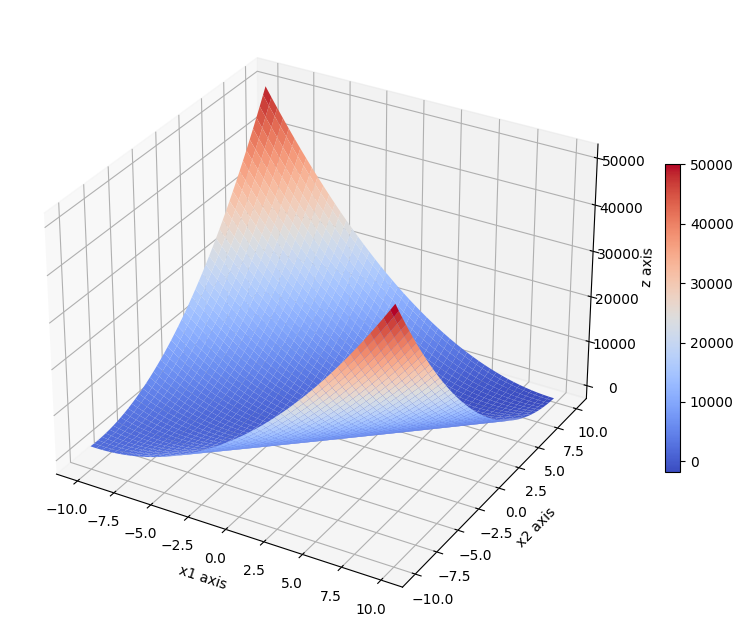

In [13]:
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('z axis')

    
f = 129*x1**2-256*x1*x2+129*x2**2-51*x1-149*x2-27

surface = ax.plot_surface(x1, x2, f, cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surface, shrink=0.5)

plt.show()

Построим линии уровня функции

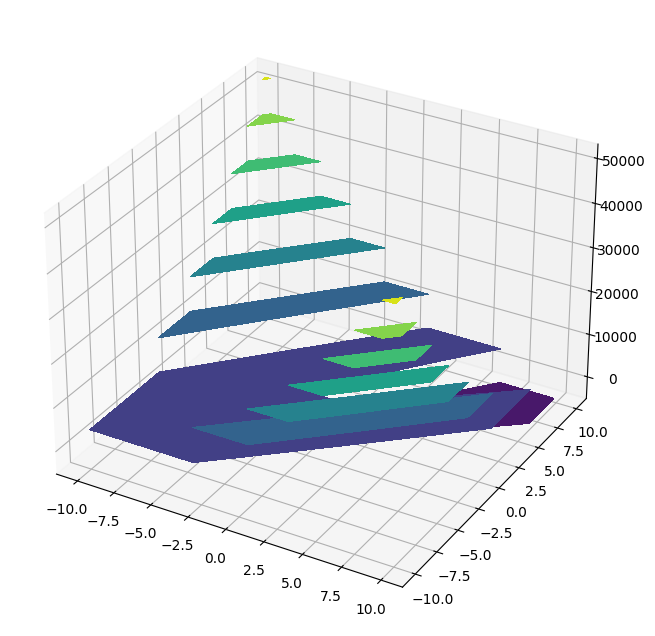

In [15]:
fig = plt.figure(figsize=(10, 8))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.contourf(x1, x2, f)
plt.show()

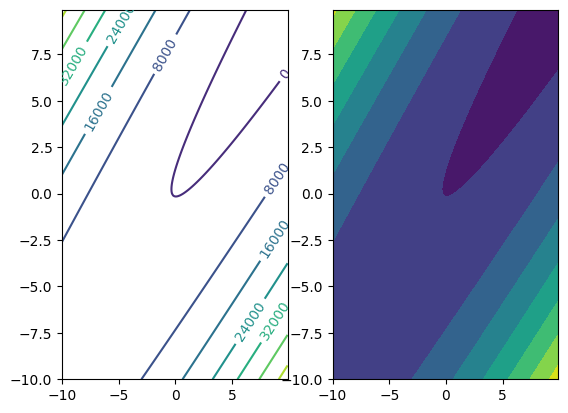

In [25]:
fig,ax= plt.subplots (1, 2)
c1 = ax[0].contour (x1, x2, f)
ax[1].contourf(x1, x2, f)
c1.clabel ()
plt.show()

Покажем минимум на графике

In [212]:
def f(x):
    return 129*x[0]**2-256*x[0]*x[1]+129*x[1]**2-51*x[0]-149*x[1]-27

def grad_f(x):
    return np.array([258*x[0] - 256*x[1] - 51,-256*x[0] + 258*x[1] - 149])

from scipy.optimize import minimize

result = minimize(f, np.zeros(2), method='trust-constr', jac=grad_f)

result.x

array([49.90466926, 50.09533074])

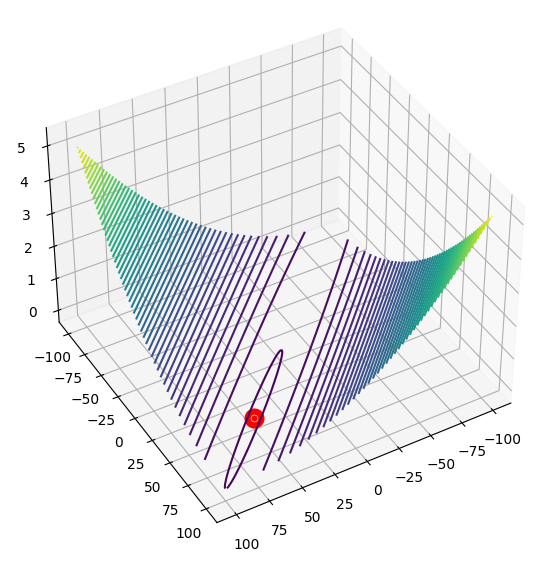

In [188]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.linspace(-100, 100, 200), np.linspace(-100, 100, 200))
Z = f(np.array([X, Y]))

min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])   
min_z = f(np.stack([min_x0, min_x1]))

fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.view_init(40, 60)

# Задание 2.

In [44]:
import sympy as sym

def f(x,y):
    return 129*x**2-256*x*y+129*y**2-51*x-149*y-27

x, y = sym.symbols('x y')

# Находим производную по x
fprime_x = sym.diff(f(x,y), x)

# Находим производную по y
fprime_y = sym.diff(f(x,y), y)

print("Производная по x:", fprime_x)
print("Производная по y:", fprime_y)


Производная по x: 258*x - 256*y - 51
Производная по y: -256*x + 258*y - 149


In [48]:
A = np.array([[258, -256], [-256, 258]])
b = np.array([51, 149])
X, Y = np.linalg.solve(A, b)
print("Точка M0: ",X,Y)
print("Значение функции в точке M0: ",f(X,Y))

Точка M0:  49.904669260700345 50.09533073929957
Значение функции в точке M0:  -5031.671206225655


В найденной точке может быть минимум, максимум либо перевал, и выяснить, что же там на самом деле, нам поможет достаточное условие экстремума функции двух переменных

In [49]:

fprime_xx = sym.diff(f(x,y), x,x)
fprime_xx

258

In [50]:
fprime_xy = sym.diff(f(x,y), x,y)
fprime_xy

-256

In [51]:
fprime_yy = sym.diff(f(x,y), y,y)
fprime_yy

258

In [52]:
A = 258
B = -256
C = 258
print(A*C -B**2)

1028


1028>0 Следовательно, точка является экстремумом. A больше нуля, следовательно точка M0- минимум функции

# Задание 3.

In [266]:
def f(x):
    return 129*x[0]**2-256*x[0]*x[1]+129*x[1]**2-51*x[0]-149*x[1]-27

def grad_f(x,y):
    return 258*x - 256*y - 51,-256*x + 258*y - 149

def steepest_descent(f, grad_f, x0, y0, eps,max_iter):
    x_list = []
    y_list=[]
    k = 0
    while (abs(grad_f(x0,y0)[0])>eps or abs(grad_f(x0,y0)[1])>eps) and max_iter>k:
        memory_y = f([x0,y0])
        x_list.append(x0)
        y_list.append(y0)
        gx, gy = grad_f(x0,y0)
        if np.sqrt(gx**2 + gy**2) <= eps:
            break
        px, py = -gx, -gy
        
        def f_alpha(alpha):
            return f([x0 + alpha*px, y0 + alpha*py])  
        alpha = minimize_scalar(f_alpha).x  
        x0 = x0 + alpha*px
        y0 = y0 + alpha*py
        k += 1
        y = f([x0,y0])
        if abs(memory_y-y)<=eps:
            break
    return x0, y0, k,x_list,y_list
    
x0 = 2
y0 = -11
eps = 1e-7
max_iter = 600

# Применяем метод наискорейшего спуска к заданной функции
x_min, y_min, k,x_list,y_list = steepest_descent(f, grad_f, x0, y0, eps,max_iter)

# Выводим результат
print("x =", x_min)
print("y =", y_min)
print("f(x, y) =", f([x_min, y_min]))
print("Число итераций=", k)

x = 49.90461312986696
y = 50.09527458916817
f(x, y) = -5031.671206219426
Число итераций= 17


# Задание 4

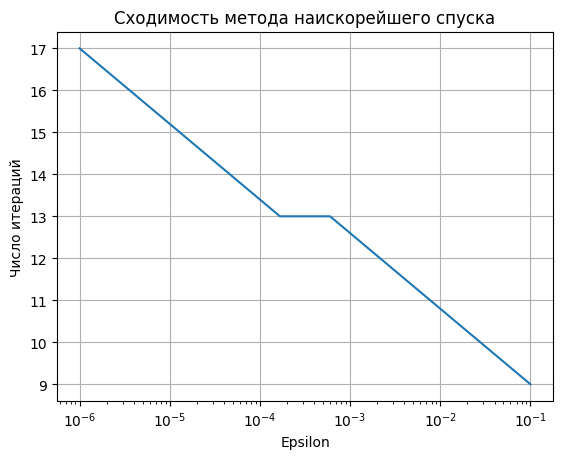

In [272]:
eps_list = np.logspace(-6, -1, 10)

# Создаем пустой список для числа итераций
iter_list = []

# Для каждого значения точности вызываем метод наискорейшего спуска и сохраняем число итераций
for eps in eps_list:
    x_min, y_min, k,x_list,y_list= steepest_descent(f, grad_f, x0,y0, eps, max_iter)
    iter_list.append(k)

# Построим график зависимости числа итераций от точности
plt.plot(eps_list, iter_list)
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Число итераций')
plt.title('Сходимость метода наискорейшего спуска')
plt.grid(True)
plt.show()

# Задание 5

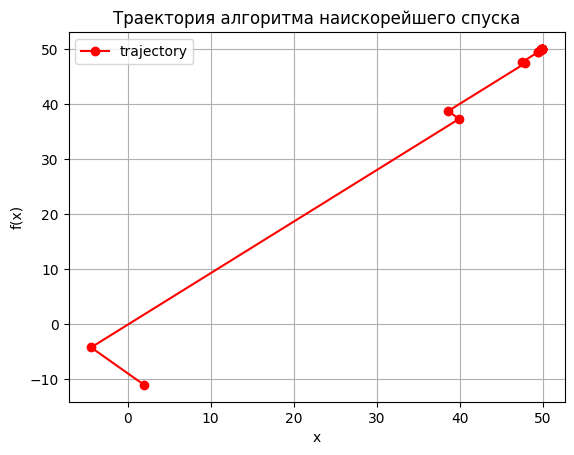

In [267]:
x_array = np.array(x_list)
y_array = np.array(y_list)
Z = f(np.array([x_array, y_array ]))

x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
f = f([x,y])
plt.plot(x_array, y_array, 'ro-', label='trajectory')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Траектория алгоритма наискорейшего спуска')
plt.legend()
plt.grid(True)
plt.show()

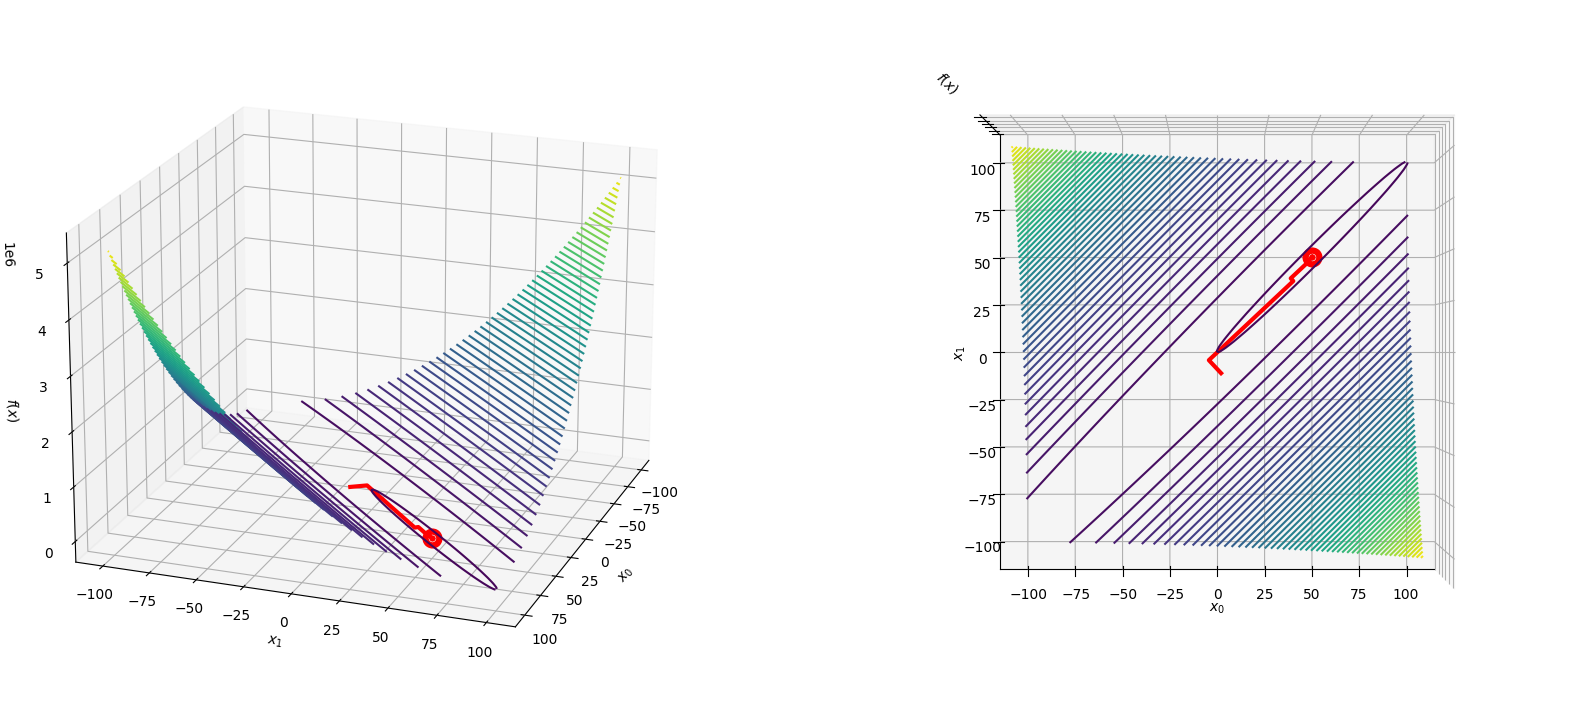

In [268]:
def f(x):
    return 129*x[0]**2-256*x[0]*x[1]+129*x[1]**2-51*x[0]-149*x[1]-27
X, Y = np.meshgrid(np.linspace(-100, 100, 200), np.linspace(-100, 100, 200))
Z = f(np.array([X, Y]))
points=[]
for i in range(len(x_list)):
    points.append([x_list[i],y_list[i]])
points=np.array(points)
X_estimate, Y_estimate = points[:, 0], points[:, 1] 
Z_estimate = f(np.array([X_estimate, Y_estimate]))


fig = plt.figure(figsize=(20, 20))


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(20, 20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90);